In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import magpylib as magpy
from matplotlib.patches import Rectangle
import random
import imageio
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg

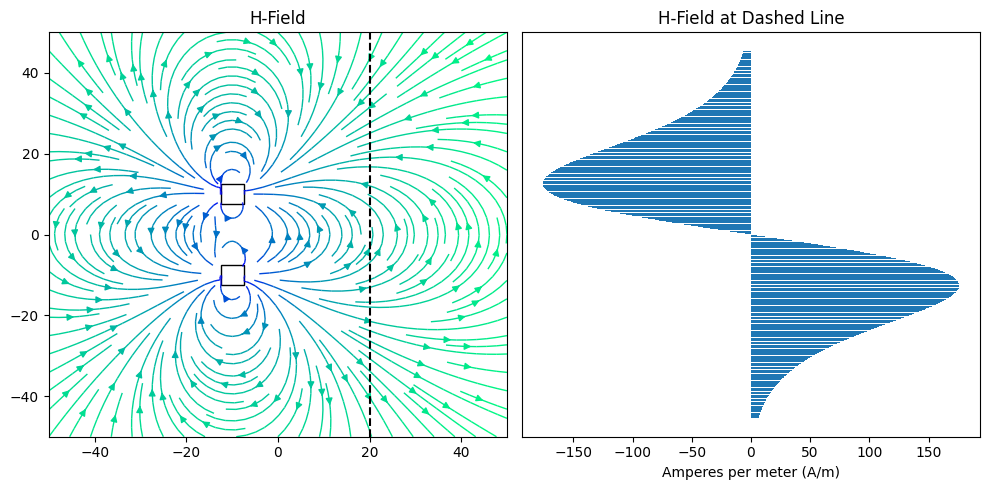

In [2]:

# Create a figure with subplots using gridspec
fig = plt.figure(figsize=(10, 5))  # Total figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Two subplots with equal widths

size = 5
# Create an observer grid in the xz-symmetry plane
X, Y = np.mgrid[-50:50:1000j, -50:50:1000j].transpose((0, 2, 1))
grid = np.stack([X, Y, np.zeros((1000, 1000))], axis=2)

pol = 2
# Compute BHJM-fields of a cylinder magnet on the grid
cube1 = magpy.magnet.Cuboid(polarization=(-pol, 0, 0), dimension=(size, size, 1), position=(-10,10,0))
cube2 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1), position=(-10,-10,0))

coll = magpy.Collection(cube1, cube2)


# B = coll.getB(grid)
H = coll.getH(grid)
# J = coll.getJ(grid)
# M = coll.getM(grid)

# Plot data on the first subplot
ax1 = plt.subplot(gs[0])
ax1.streamplot(
    grid[:, :, 0],
    grid[:, :, 1],
    H[:, :, 0],
    H[:, :, 1],
    density=1.5,
    color=np.log(np.linalg.norm(H, axis=2)),
    linewidth=1,
    cmap="winter_r",
)
ax1.set_title('H-Field')
ax1.axvline(x=20, color="k", linestyle='--' )

for magnet in coll:
    dimension = magnet.dimension
    position = magnet.position
    length = dimension[0]
    height = dimension[1]
    x = position[0]
    y = position[1]
    ax1.add_patch(Rectangle((x - length/2, y - height/2), length, height, edgecolor='k', facecolor='none'))


# Plot data on the second subplot
ax2 = plt.subplot(gs[1])
ax2.barh(width=H[:,700,0], y = np.linspace(0,1000,1000))
ax2.set_title('H-Field at Dashed Line')
ax2.set_xlabel("Amperes per meter (A/m)")
ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# ax2.set_ylabel("y-position")

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

In [3]:
magnet.polarization

array([2., 0., 0.])

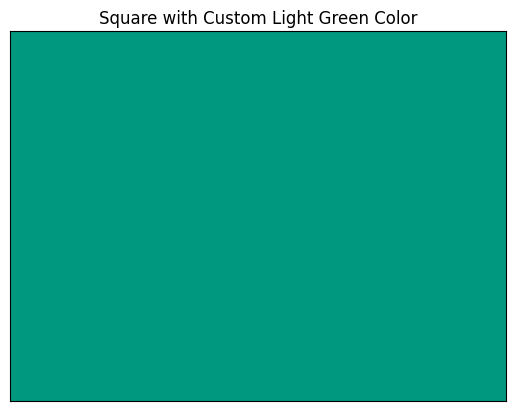

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define a custom color for light green
light_green = (0.0, 0.6, 0.5)  # RGB values for light green

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot a square with the custom light green color
square = Rectangle((0, 0), 1, 1, color=light_green)
ax.add_patch(square)

# Set x and y limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Add title
plt.title('Square with Custom Light Green Color')

# Show the plot
plt.show()


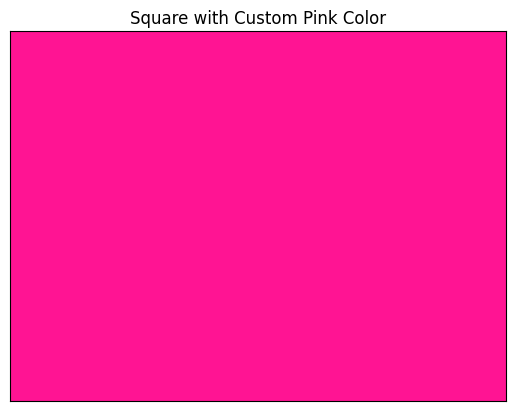

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define a custom color for pink
pink = (1, 0.078, 0.576)  # RGB values for pink

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot a square with the custom pink color
square = Rectangle((0, 0), 1, 1, color=pink)
ax.add_patch(square)

# Set x and y limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Add title
plt.title('Square with Custom Pink Color')

# Show the plot
plt.show()


In [34]:
-0 < 0

False

In [219]:
distractor_pos_list[0]

[4.539073518687584, -50]

In [599]:
def create_fig(list_xvals, list_yvals, distractor_pos_list, polarization_list, magnet_polarization, polarization_distractors):

    size = 5
    upshift = size/2
    for y in range(len(list_yvals)):
        list_yvals[y] += upshift
    for y in range(len(distractor_pos_list)):
        distractor_pos_list[y][1] += upshift

    # list_magnets - one hot which are magnets

    # Create a figure with subplots using gridspec
    fig = plt.figure(figsize=(10, 5))  # Total figure size
    gs = gridspec.GridSpec(1, 4, width_ratios=[.3, 1, .3, .3])  # Two subplots with equal widths

    
    # Create an observer grid in the xz-symmetry plane
    X, Y = np.mgrid[-50:50:1000j, -50:50:1000j].transpose((0, 2, 1))
    grid = np.stack([X, Y, np.zeros((1000, 1000))], axis=2)

    pol = 2
    # Compute BHJM-fields of a cylinder magnet on the grid
    cube1 = magpy.magnet.Cuboid(polarization=(magnet_polarization[0], 0, 0), dimension=(size, size, 1), position=(list_xvals[0],list_yvals[0],0))
    cube2 = magpy.magnet.Cuboid(polarization=(magnet_polarization[1], 0, 0), dimension=(size, size, 1), position=(list_xvals[1],list_yvals[1],0))
    cube3 = magpy.magnet.Cuboid(polarization=(magnet_polarization[2], 0, 0), dimension=(size, size, 1), position=(list_xvals[2],list_yvals[2],0))
    cube4 = magpy.magnet.Cuboid(polarization=(magnet_polarization[3], 0, 0), dimension=(size, size, 1), position=(list_xvals[3],list_yvals[3],0))
    cube5 = magpy.magnet.Cuboid(polarization=(magnet_polarization[4], 0, 0), dimension=(size, size, 1), position=(list_xvals[4],list_yvals[4],0))

    coll = magpy.Collection(cube1, cube2, cube3, cube4, cube5)
    H = coll.getH(grid)

    colors = [light_green, (0., 0., 0.), pink]  
    #bounds = [-1, 0, 1]  # Values corresponding to colors
    cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(np.linspace(0, 1, len(colors)), colors)))
    data = np.zeros((20,3))#np.random.randint(-1, 2, size=(20, 3))
    for ix in range(len(polarization_list)):
        polix = polarization_list[ix]
        col = int(abs(polix))
        #print(col)
        #if polix > 0:
        if int(polix) == 0:
            if polix > 0:
                polix = 1
            elif polix < 0:
                polix = -1
        data[-ix-1][col] = polix 

        #data[-ix] = 
    ax0 = plt.subplot(gs[0])
    ax0.imshow(data, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1, aspect="auto")
    #ax0.set_ylabel("Genes/ Magnets & distractors")
    ax0.set_title("Genotype/\n polarization")
    ax0.set_xticks([0, 1, 2])
    locations = ['LOC' + format(i, '02') for i in range(1, 21)]
    ax0.set_yticks(range(20), locations)
    ax0.set_xticks([])

    ax1 = plt.subplot(gs[1])
    ax1.streamplot(
        grid[:, :, 0],
        grid[:, :, 1],
        H[:, :, 0],
        H[:, :, 1],
        density=2.2,
        color=np.log(np.linalg.norm(H, axis=2)),
        linewidth=1,
        cmap='Greys',
    )
    ax1.set_title('Gene expression/\n magnet position & H-field')
    ax1.axvline(x=20, color="k", linestyle='--' )

    for magnet in coll:
        dimension = magnet.dimension
        position = magnet.position
        polarisation = magnet.polarization[0]
        if polarisation > 0:
            fc_left = light_green
            fc_right = pink
            alpha = 0.7
        elif polarisation<0:
            fc_left = pink
            fc_right = light_green
            alpha = 0.7
        else:
            fc_left = pink
            fc_right = light_green
            alpha = 0.1

        length = dimension[0]
        height = dimension[1]
        x = position[0]
        y = position[1]
        ax1.add_patch(Rectangle((x- length/2, y - height/2), length/2, height, edgecolor='k', facecolor=fc_left, alpha=alpha))
        ax1.add_patch(Rectangle((x, y - height/2), length/2, height, edgecolor='k', facecolor=fc_right, alpha=alpha))
        bar_height = height*0.85
        ax1.add_patch(Rectangle((-50, y - bar_height/2), 50+x-length/2, bar_height, edgecolor='k', facecolor="k", alpha=1))

    i = 0
    for distractor in distractor_pos_list:
        x = distractor[0]
        y = distractor[1]
        distractor_polarisation = polarization_list[i]
        if distractor_polarisation > 0:
            fc_left = light_green
            fc_right = pink
            alpha = 0.7
        elif distractor_polarisation<0:
            fc_left = pink
            fc_right = light_green
            alpha = 0.7
        else:
            fc_left = pink
            fc_right = light_green
            alpha = 0.1
        ax1.add_patch(Rectangle((x- length/2, y - height/2), length/2, height, edgecolor='k', facecolor=fc_left, alpha=0.1))
        ax1.add_patch(Rectangle((x, y - height/2), length/2, height, edgecolor='k', facecolor=fc_right, alpha=0.1))
        ax1.add_patch(Rectangle((-50, y - bar_height/2), 50+x-length/2, bar_height, edgecolor='k', facecolor="k", alpha=1))
        i += 1
    ax1.set_xticks([])
    ax1.set_yticks([])   


    Hmean = np.mean(H[:,700,0])

    ax2 = plt.subplot(gs[2])
    colors = [pink if val >= 0 else light_green for val in H[:,700,0]]
    ax2.barh(width=H[:,700,0], y = np.linspace(0,1000,1000), height=1, color=colors)
    ax2.set_xlim(-200,200)
    ax2.set_title('Magnetic \nintensity')
    #ax2.set_xlabel("A/m")
    ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax2.set_xticks([])
    ax2.set_yticks([]) 

    
    img = mpimg.imread('figures/DALLE_SALMON.png')
    rotated_img = np.rot90(img, k=3)
    ax3 = plt.subplot(gs[3])
    colors = [pink if val >= 0 else light_green for val in H[:,700,0]]

    img_width, img_height = rotated_img.shape[1], rotated_img.shape[0]
    subplot_width, subplot_height = 500, 1500
    aspect_ratio = img_width / img_height
    if aspect_ratio > subplot_width / subplot_height:
        width = subplot_width
        height = width / aspect_ratio
    else:
        height = subplot_height
        width = height * aspect_ratio
    size_increase = 1
    width *= size_increase  # Doubling the width of the image
    height *= size_increase  # Doubling the height of the image 
    x_pos = (subplot_width - width) / 2
    y_pos = (subplot_height - height) / 2
    x_pos += 0#.25  # Move the image 0.1 units to the right
    y_pos += 7  # Move the image 0.1 units up

    # Add the rotated image as a patch to the subplot
    ax3.imshow(rotated_img, extent=[x_pos, x_pos + width, y_pos, y_pos + height])  # Adjust extent to set size
    #ax3.imshow(rotated_img)
    ax3.set_ylim(0,1600)
    
    for ax in [ax1,ax2,ax3]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    ax3.set_title(f'Phenotype:\nweight')
    ax3.set_xticks([])
    ax3.set_yticks([]) 


    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1)
    #plt.savefig(f"movie_v2_{idx}.png")
    plt.show()

In [615]:
number_total_genes = 5
list_yvals = [-40,-20,0,20,40]
list_xvals = np.random.uniform(-20,5, size=number_total_genes)
magnet_positions = [list_yvals[0], list_yvals[1], list_yvals[2], list_yvals[3], list_yvals[4]]
magnets_used = 0

distractor_pos_list = []
for i in list(range(-50, 50, 5)):
    if i not in magnet_positions:
        distractor_pos_list.append([np.random.uniform(-20,5), i])

In [616]:
len(distractor_pos_list)

15

In [617]:
EPS = 0.00001

In [620]:
# left to right in polarization list is bottom up in fig
polarization_magnets = [1,-2, 2, -1, 1]
polarization_distractors = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] # #
polarization_list = [-EPS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# polarization_list = [-EPS,EPS,polarization_magnets[0],
#                      EPS,2,1,polarization_magnets[1],
#                      -1,-EPS,2,polarization_magnets[2],
#                     1,2,EPS,polarization_magnets[3],
#                     -1,-1,-2,polarization_magnets[4],-EPS] #[-EPS,1,-2,EPS,2,-1,-EPS,2,EPS,-EPS,1,EPS,-2,-EPS,-1,2,-EPS,EPS,-1,EPS]

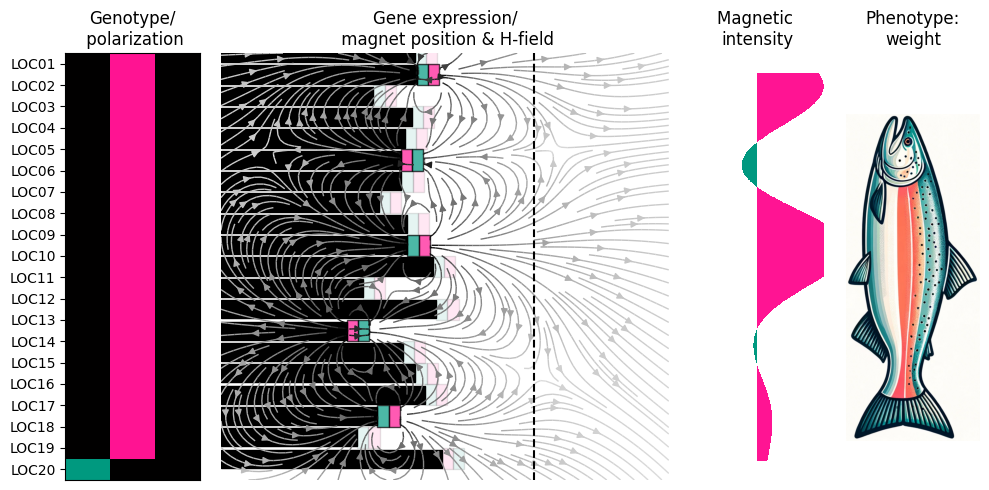

In [621]:
create_fig(list_xvals, list_yvals, distractor_pos_list, polarization_list, polarization_magnets, polarization_distractors)